# Perceptron Learning Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
import copy

np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': (20,9)})

### Generate Data

In [4]:
mean_1 = [4, 2]
cov_1 = [[3, 0], [0, 3]]

mean_2 = [-4, -2]
cov_2 = [[3, 0], [0, 3]]

n_samples = 100

samples_class_1 = np.random.multivariate_normal(mean=mean_1, cov=cov_1, size=n_samples)
samples_class_2 = np.random.multivariate_normal(mean=mean_2, cov=cov_2, size=n_samples)

data = np.vstack((samples_class_1, samples_class_2))

labels_1 = np.array([1] * n_samples)
labels_2 = np.array([-1] * n_samples)

labels = np.hstack((labels_1, labels_2))

### Plot the data

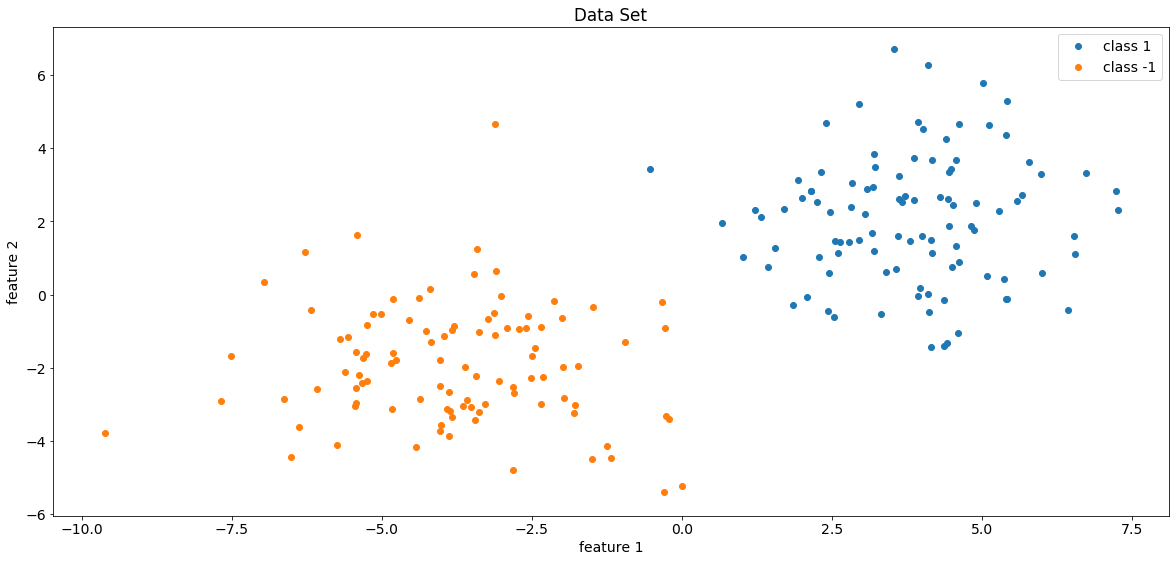

In [5]:
plt.scatter(samples_class_1[:, 0], samples_class_1[:, 1], label='class 1')
plt.scatter(samples_class_2[:, 0], samples_class_2[:, 1], label='class -1')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.title("Data Set")
plt.show()

### Shuffle data

In [6]:
p = np.random.permutation(len(labels))
data = data[p, :]
labels = labels[p]

### Perceptron Algorithm

In [7]:
def perceptron_learning(X, y, return_init_weights=False):
    # extend weight vector
    data_extended = np.hstack((np.array([1] * X.shape[0]).reshape(-1, 1), X))
    weights = np.random.random(data_extended.shape[1]).reshape(-1, 1)
    init_weights = weights
    loss = X.shape[0]
    limit = 1000
    y = y.reshape(-1, 1)
    while loss > 0.0:
        # update in vector form
        deltas = np.subtract(y, np.sign(np.dot(data_extended, weights)))
        loss = np.abs(np.sum(deltas))
        update_vals = deltas * data_extended
        # iterative way of updating weights
        #for i in range(update_vals.shape[0]):
        #    weights = np.add(weights, update_vals[i, :].reshape(-1, 1))
        
        # update weights
        weights = np.add(weights, np.sum(update_vals, axis=0).reshape(-1, 1))
    if return_init_weights:
        return weights, init_weights
    else:
        return weights

In [8]:
w, init_weights = perceptron_learning(data, labels, return_init_weights=True)

In [9]:
print('Final Weights:\n{}'.format(w))

Final Weights:
[[ 12.10178247]
 [439.74135758]
 [282.23839641]]


$w_2x_2 + w_1x_1 + w_0 = 0$

$x_2 = \frac{-w_1x_1 - w_0}{w_2}$

### Function to generate plot data of the hyperplane

In [10]:
def y(w0, w1, w2, x):
    return (-w1 * x - w0) / w2

In [11]:
x_vals = np.array(list(range(-10, 10)))

In [12]:
y_vals_init = y(init_weights[0], init_weights[1], init_weights[2], x_vals)

In [13]:
y_vals = y(w[0], w[1], w[2], x_vals)

### Plot resulting hyperplane

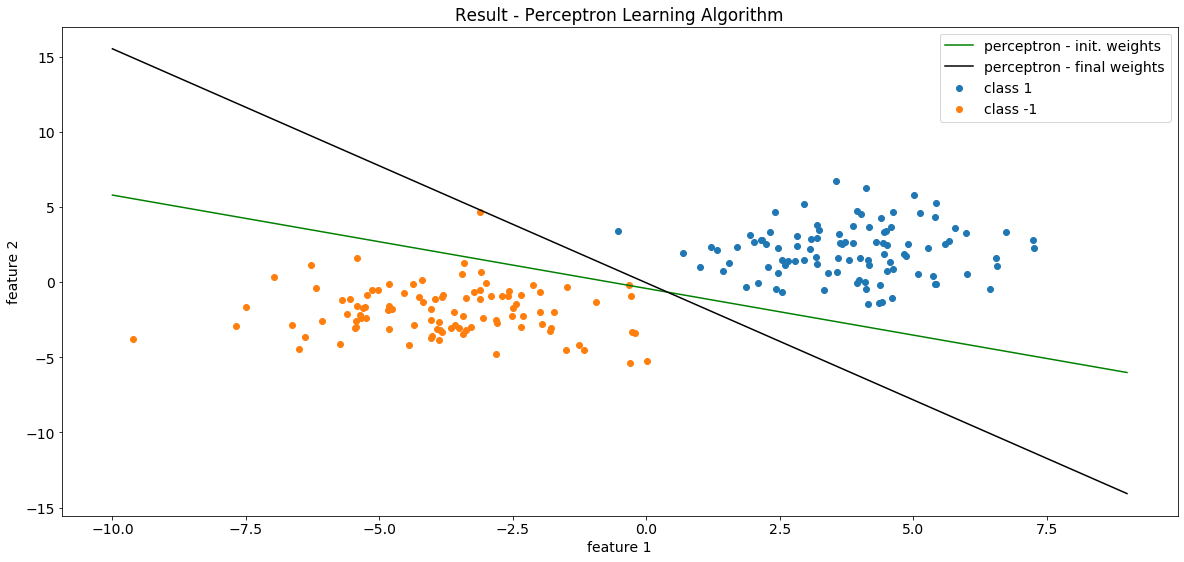

In [14]:
plt.scatter(samples_class_1[:, 0], samples_class_1[:, 1], label='class 1')
plt.scatter(samples_class_2[:, 0], samples_class_2[:, 1], label='class -1')
plt.plot(x_vals, y_vals_init, label='perceptron - init. weights', color='green')
plt.plot(x_vals, y_vals, label='perceptron - final weights', color='black')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.title('Result - Perceptron Learning Algorithm')
plt.savefig('plots/perceptron_plot.pdf', bbox_inches='tight')
plt.show()

#### References:
* Bishop, Christopher M. Pattern recognition and machine learning. springer, 2006.